In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [17]:
ruta = '/content/drive/MyDrive/yo_ascensor1.jpeg'

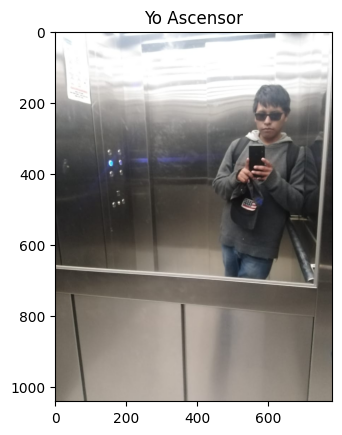

In [18]:
img = cv2.imread(ruta)
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Yo Ascensor')
plt.imshow(img_cvt)
plt.show()

**Histograma de Imagen en escala de Grises**

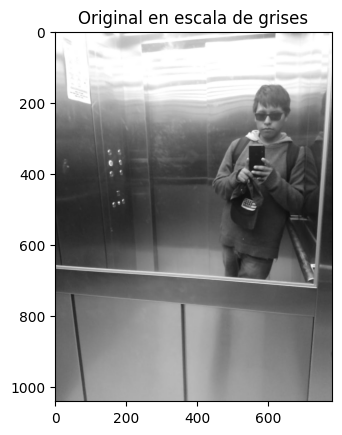

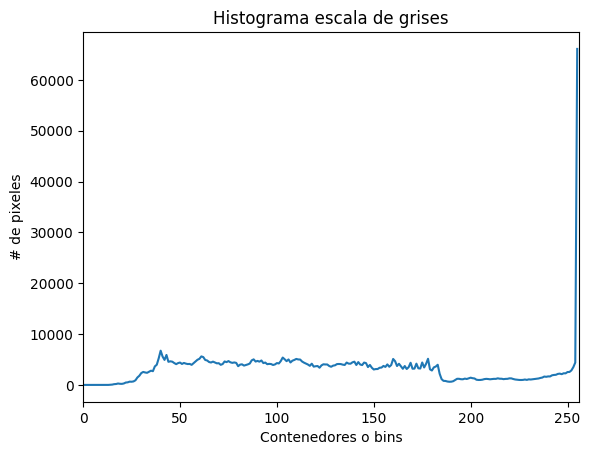

In [19]:
img_gray = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
img_cvt = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.title('Original en escala de grises')
plt.imshow(img_cvt)
plt.show()

hist = cv2.calcHist([img_cvt], [0], None, [256], [0, 256])
plt.figure()
plt.title("Histograma escala de grises")
plt.xlabel("Contenedores o bins")
plt.ylabel("# de pixeles")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


**Histograma de Imagen a Color**

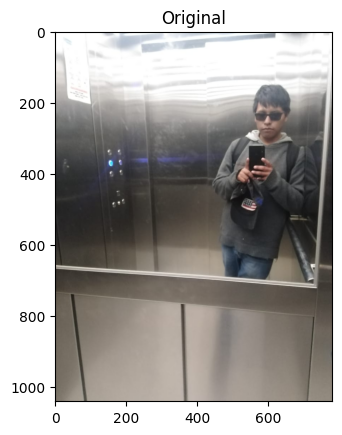

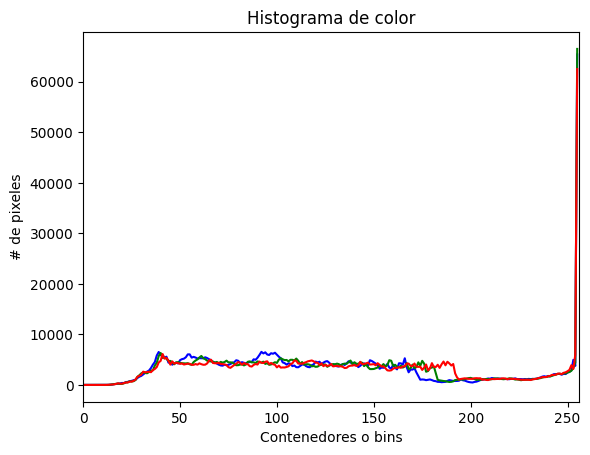

In [20]:
img = cv2.imread(ruta, cv2.IMREAD_COLOR)
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Original')
plt.imshow(img_cvt)
plt.show()

chans = cv2.split(img)
colors = ("b", "g", "r")
plt.figure()
plt.title("Histograma de color")
plt.xlabel("Contenedores o bins")
plt.ylabel("# de pixeles")
for chan, color in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.xlim([0, 256])
plt.show()


Histogramas de color 2D para cada combinacion de canales R,G,B

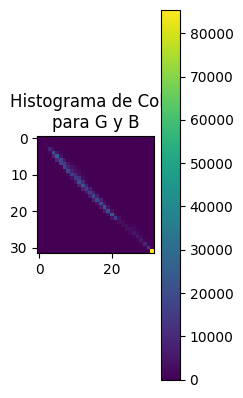

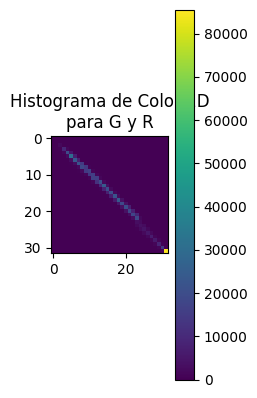

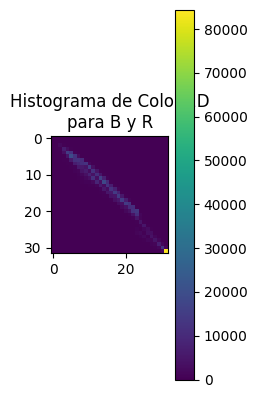

In [21]:
fig = plt.figure()

# Primer subgráfico: Histograma de Color para G y B
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("Histograma de Color\npara G y B")
plt.colorbar(p)
plt.show()

# Segundo subgráfico: Histograma de Color 2D para G y R
fig = plt.figure()
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("Histograma de Color 2D\npara G y R")
plt.colorbar(p)
plt.show()

# Tercer subgráfico: Histograma de Color 2D para B y R
fig = plt.figure()
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("Histograma de Color 2D\npara B y R")
plt.colorbar(p)
plt.show()


In [22]:
print("Forma del histograma 2D: {}, con {} valores".format(hist.shape, hist.flatten().shape[0]))

Forma del histograma 2D: (32, 32), con 1024 valores


In [23]:
hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("Forma del histograma 3D: {}, con {} valores".format(hist.shape, hist.flatten().shape[0]))


Forma del histograma 3D: (8, 8, 8), con 512 valores


**Ecualizacion de Imagen**

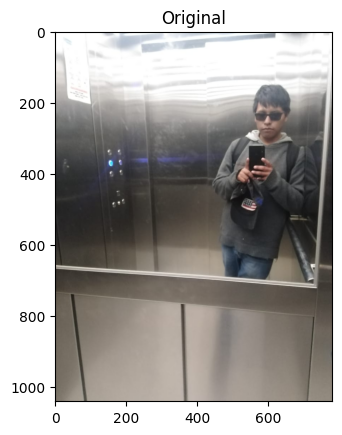

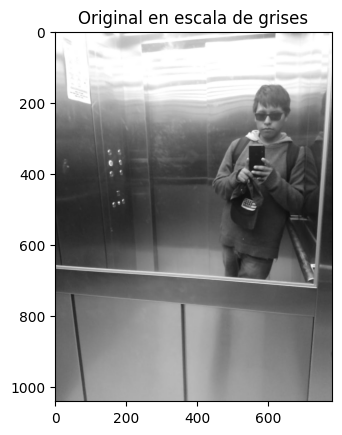

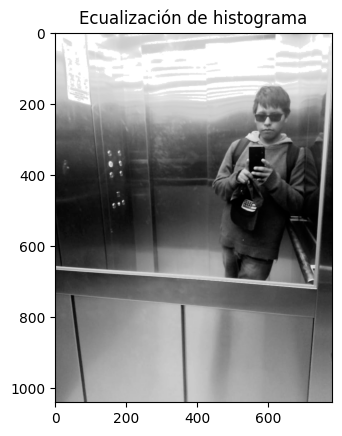

In [25]:
import cv2
import matplotlib.pyplot as plt

ruta = '/content/drive/MyDrive/yo_ascensor1.jpeg'

# Leer imagen en color
img = cv2.imread(ruta, cv2.IMREAD_COLOR)
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Original')
plt.imshow(img_cvt)
plt.show()

# Leer imagen en escala de grises
img_gray = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
img_cvt = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.title('Original en escala de grises')
plt.imshow(img_cvt)
plt.show()

# Ecualizar histograma
eq = cv2.equalizeHist(img_gray)
img_cvt = cv2.cvtColor(eq, cv2.COLOR_BGR2RGB)
plt.title('Ecualización de histograma')
plt.imshow(img_cvt)
plt.show()


**Histogramas y Mascaras**

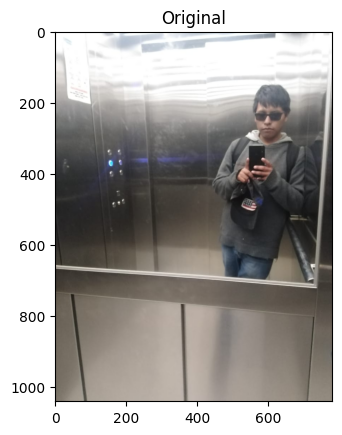

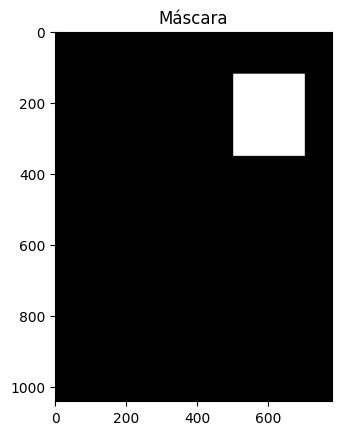

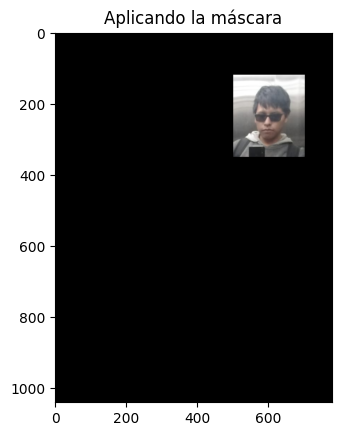

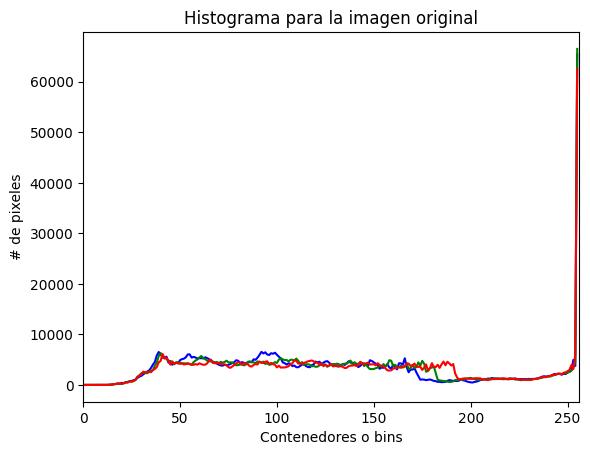

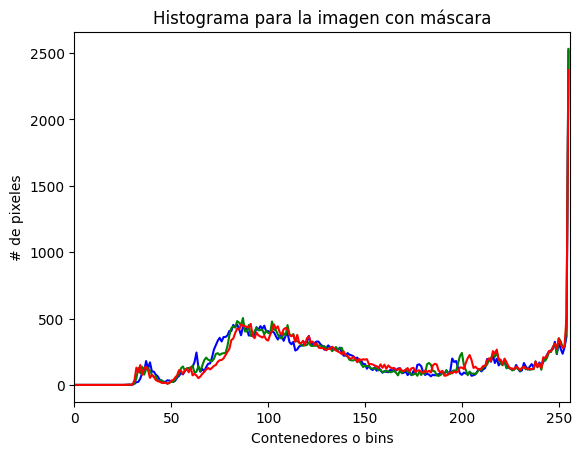

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ruta = '/content/drive/MyDrive/yo_ascensor1.jpeg'

def plot_histogram(img, title, mask=None):
    channels = cv2.split(img)
    colors = ("b", "g", "r")
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Contenedores o bins")
    plt.ylabel("# de pixeles")
    
    for channel, color in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
    
    plt.xlim([0, 256])

img = cv2.imread(ruta, cv2.IMREAD_COLOR)
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Original')
plt.imshow(img_cvt)
plt.show()

mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.rectangle(mask, (500, 120), (700, 350), 255, -1)
img_cvt = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.title('Máscara')
plt.imshow(img_cvt)
plt.show()

masked = cv2.bitwise_and(img, img, mask=mask)
img_cvt = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)
plt.title('Aplicando la máscara')
plt.imshow(img_cvt)
plt.show()

plot_histogram(img, "Histograma para la imagen original")
plot_histogram(img, "Histograma para la imagen con máscara", mask=mask)
